### PCA from scratch

Number of samples: 150
Number of features: 4


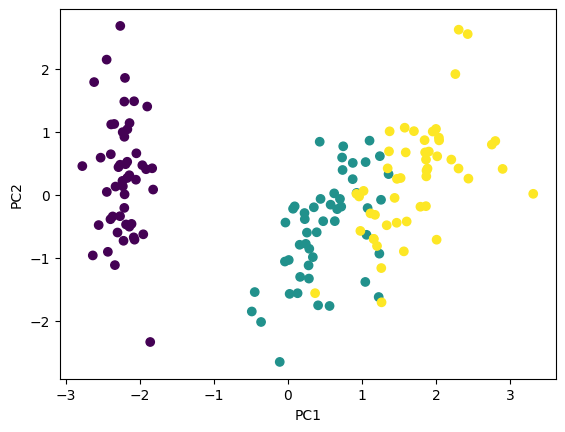

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

iris = load_iris()
X = iris['data']
y = iris['target']

n_samples, n_features = X.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)

def PCA_numpy(X,y):
    def mean(x): # np.mean(X, axis = 0)  
        return sum(x)/len(x)  

    def std(x): # np.std(X, axis = 0)
        return (sum((i - mean(x))**2 for i in x)/len(x))**0.5

    def Standardize_data(X):
        return (X - mean(X))/std(X)

    def covariance(x): 
        return (x.T @ x)/(x.shape[0]-1)

    # Step 1: Standardize the data
    X_std = Standardize_data(X)
    # Step 2: Find the covariance matrix
    cov_mat = covariance(X_std) # np.cov(X_std.T)

    # Step 3: Find the eigenvectors and eigenvalues of the covariance matrix
    eig_vals, eig_vecs = eig(cov_mat) 

    max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
    signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
    eig_vecs = eig_vecs*signs[np.newaxis,:]
    eig_vecs = eig_vecs.T

    # Step 4: Rearrange the eigenvectors and eigenvalues 
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

    # Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    eig_vals_sorted = np.array([x[0] for x in eig_pairs])
    eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
    
    # Step 5: Choose principal components
    k = 2
    W = eig_vecs_sorted[:k, :] # Projection matrix

    # Step 6: Project the data
    X_proj = X_std.dot(W.T)

    return X_proj

X_proj = PCA_numpy(X,y)
plt.scatter(X_proj[:, 0], X_proj[:, 1], c = y)
plt.xlabel('PC1')
plt.ylabel('PC2')
path="/home/suzy/gitrepos/tuttelikz/machine-learning/221210-pca/images/pca_scratch.png"
plt.savefig(path, dpi=300)
plt.show()

### PCA from library

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)